<a href="https://colab.research.google.com/github/LEOWJSheng/machineLearningLab2/blob/main/ML_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Data**#

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install visualkeras
import visualkeras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from keras.utils import plot_model
from PIL import Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 11.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive

drive.mount('/content/drive/')
%cd /content/drive/My Drive/wine/
white_df = pd.read_csv("winequality-white.csv", sep=";")
white_df["is_red"] = 0
white_df = white_df.drop_duplicates(keep='first')
print(white_df.head())

Mounted at /content/drive/
/content/drive/My Drive/wine
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
6            6.2              0.32         0.16             7.0      0.045   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
6                 30.0                 136.0   0.9949  3.18       0.47   

   alcohol  quality  is_red  


In [ ]:
red_df = pd.read_csv("winequality-red.csv", sep=";")
red_df["is_red"] = 1 
red_df = red_df.drop_duplicates(keep='first')
print(red_df.info)

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
5315            6.2              0.21         0.29             1.6      0.039   
5316            6.6              0.32         0.36             8.0      0.047   
5317            6.5              0.24         0.19             1.2      0.041   
5318            5.5              0.29         0.30             1.1      0.022   
5319            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

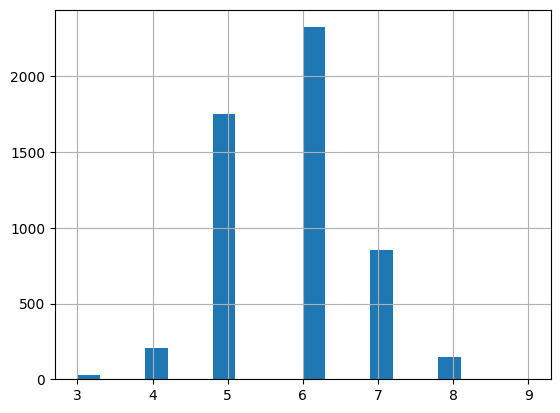

In [ ]:
red_df['type'] = 1
white_df['type'] = 0
df = pd.concat([red_df, white_df], ignore_index=True)
print(df)
df['quality'].hist(bins=20);

#**Visualization of Data**#

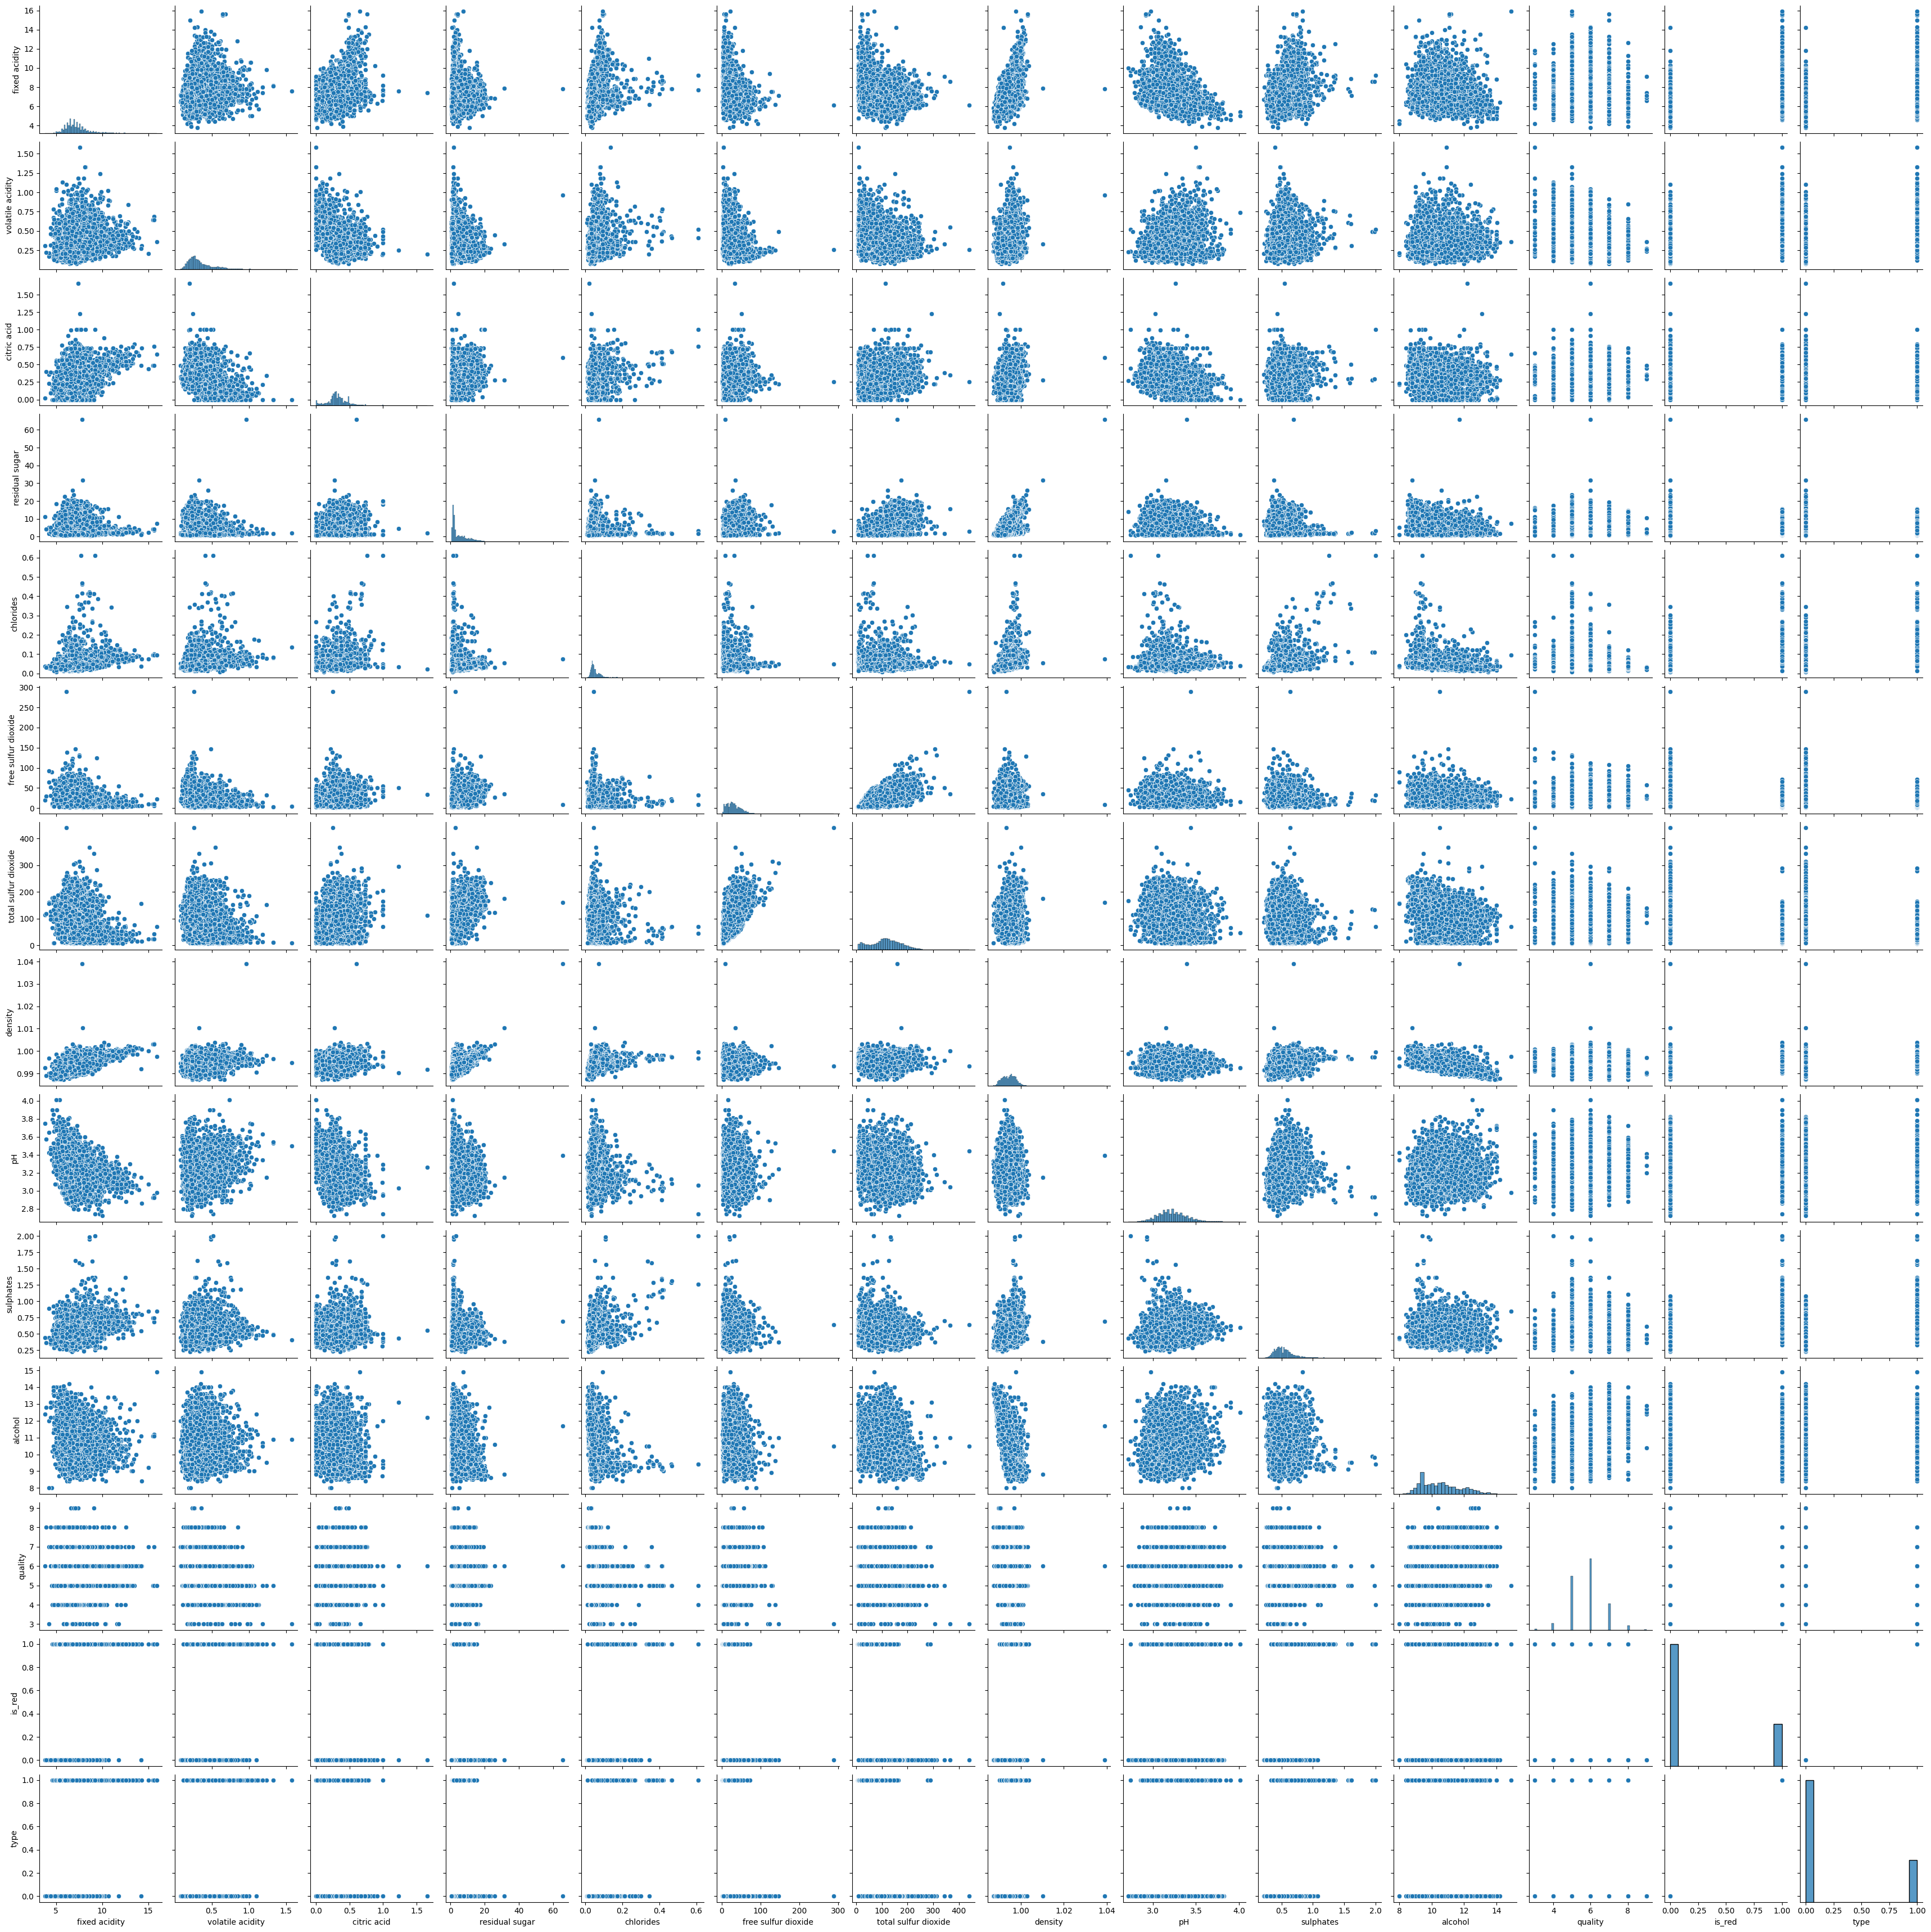

In [ ]:
sns.pairplot(df)
plt.show()

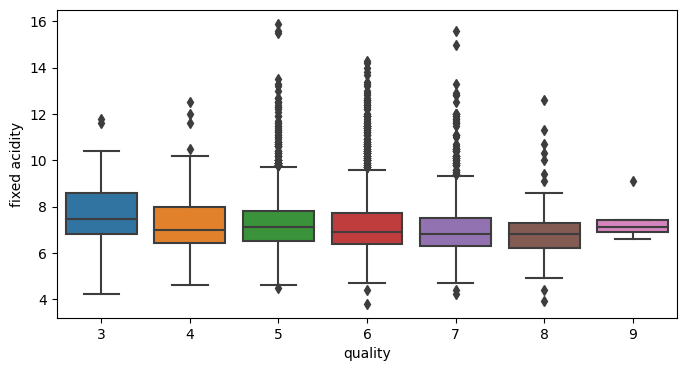

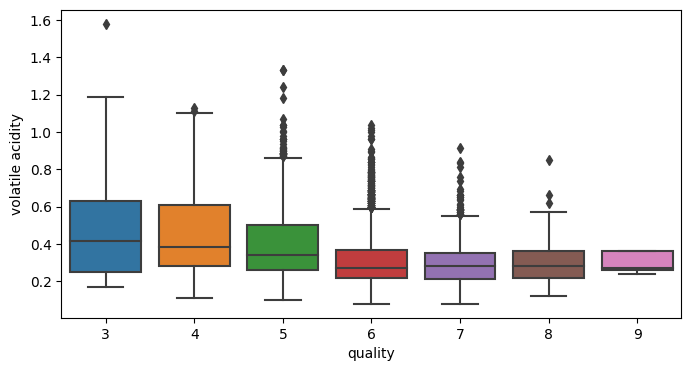

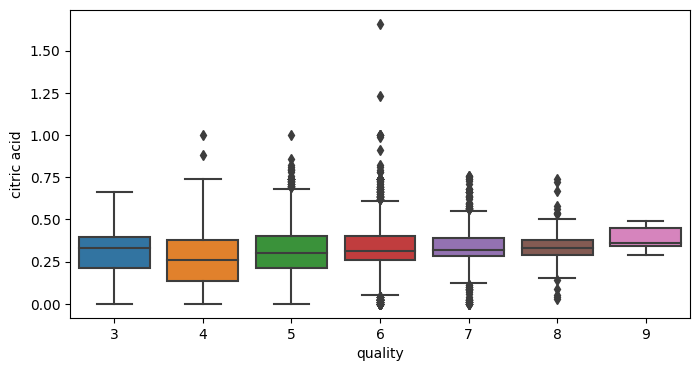

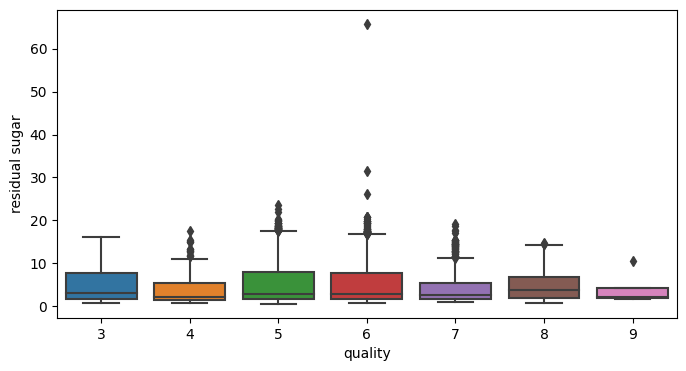

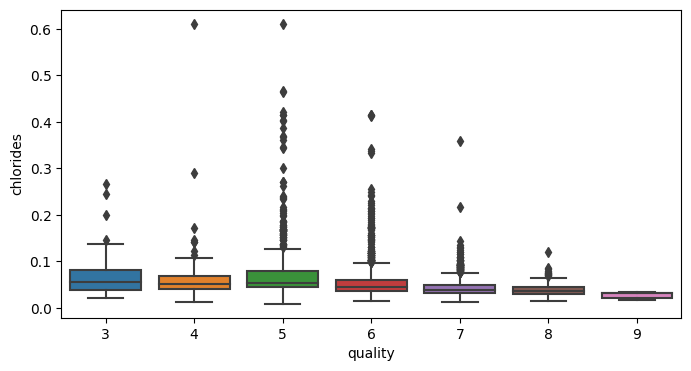

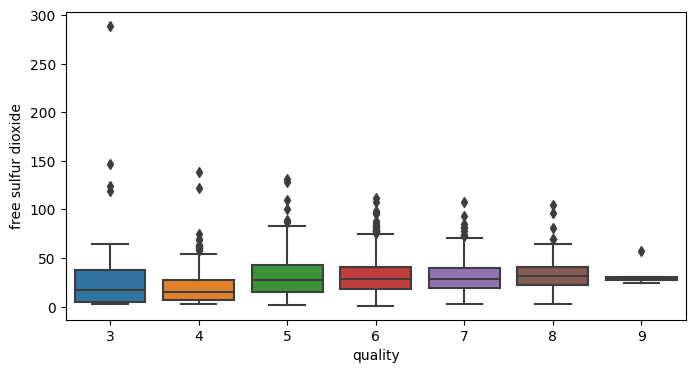

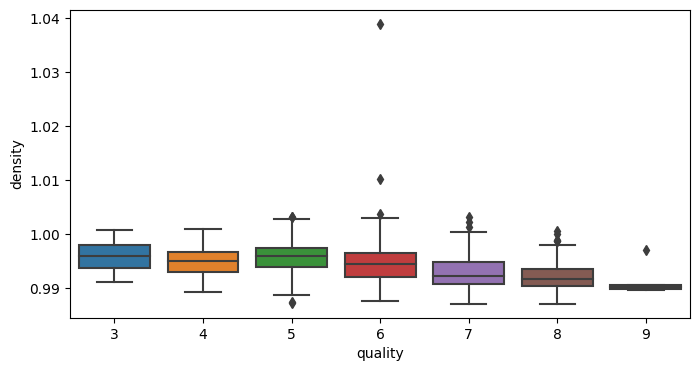

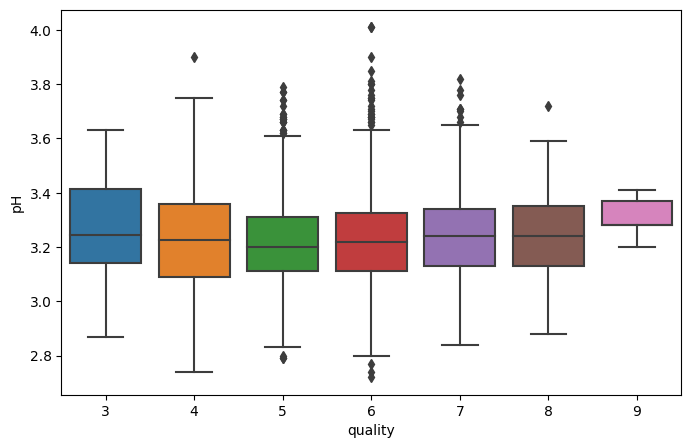

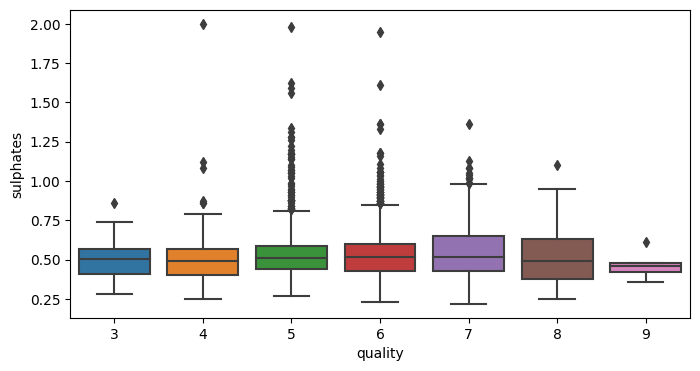

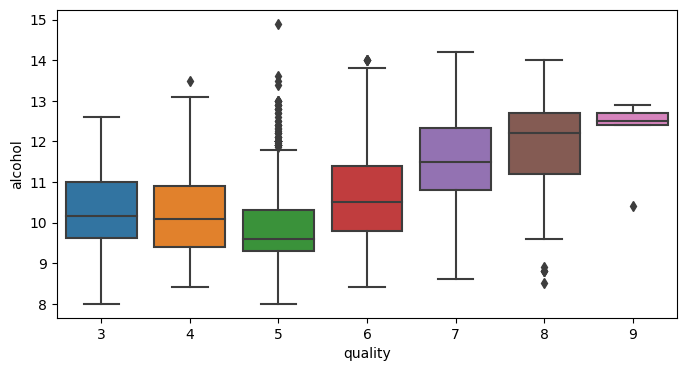

In [6]:
fig = plt.figure(figsize = (8,4))
ax = sns.boxplot( x = 'quality', y = 'fixed acidity', data = df )
fig = plt.figure(figsize = (8,4))
ax = sns.boxplot( x = 'quality', y = 'volatile acidity', data = df)
fig = plt.figure(figsize = (8,4))
ax = sns.boxplot( x = 'quality', y = 'citric acid', data = df )
fig = plt.figure(figsize = (8,4))
ax = sns.boxplot( x = 'quality', y = 'residual sugar', data = df )
fig = plt.figure(figsize = (8,4))
ax = sns.boxplot( x = 'quality', y = 'chlorides', data = df )
fig = plt.figure(figsize = (8,4))
ax = sns.boxplot( x = 'quality', y = 'free sulfur dioxide', data = df )
fig = plt.figure(figsize = (8,4))
ax = sns.boxplot( x = 'quality', y = 'density', data = df )
fig = plt.figure(figsize = (8,5))
ax = sns.boxplot( x = 'quality', y = 'pH', data = df )
fig = plt.figure(figsize = (8,4))
ax = sns.boxplot( x = 'quality', y = 'sulphates', data = df )
fig = plt.figure(figsize = (8,4))
ax = sns.boxplot( x = 'quality', y = 'alcohol', data = df )

<ipython-input-7-e9b2f3ff6ab5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['quality'])


<Axes: xlabel='quality', ylabel='Density'>

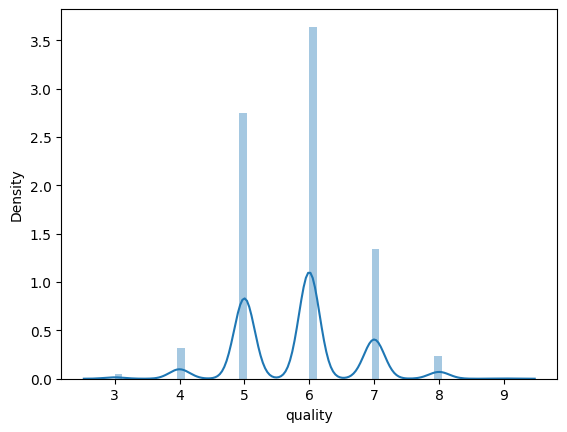

In [7]:
sns.distplot(df['quality'])

#**Correlation Matrix**#

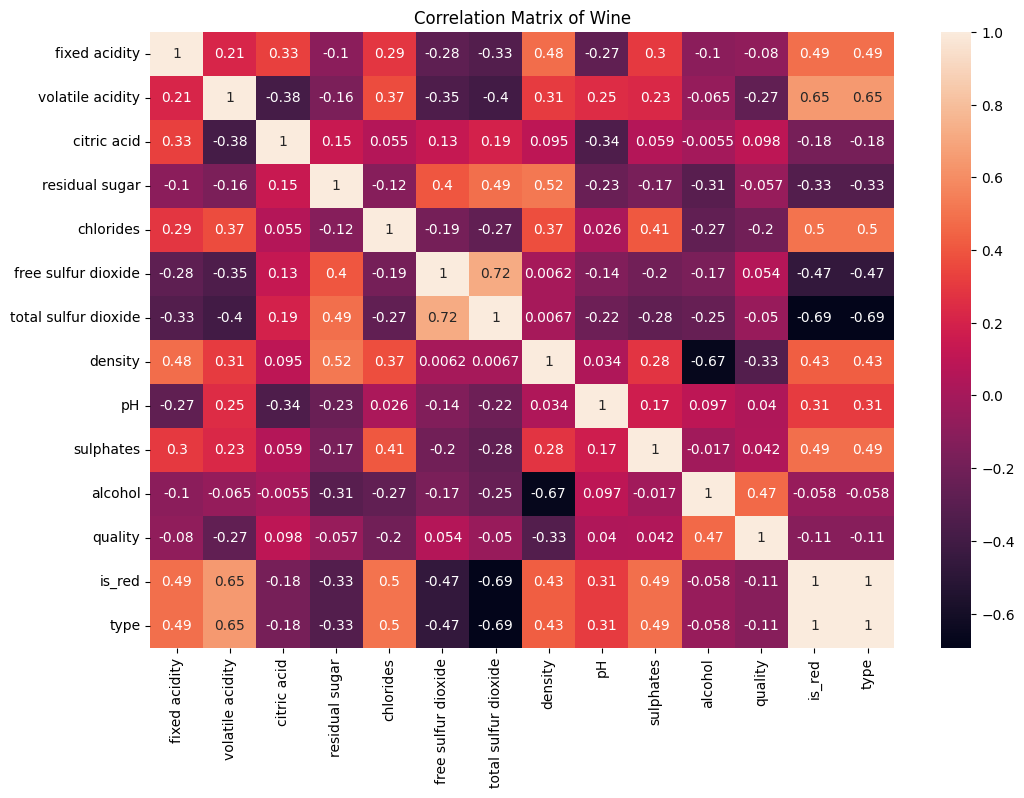

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Matrix of Wine")
plt.show()

#**Train and Split Data**#

In [9]:
X = df.iloc[:,0:11]
y = np.ravel(df.type)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)  

##**Normalization of Data**##

In [10]:
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)
print(df_normalized)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.297521          0.413333     0.000000        0.019939   0.111296   
1          0.330579          0.533333     0.000000        0.030675   0.147841   
2          0.330579          0.453333     0.024096        0.026074   0.137874   
3          0.611570          0.133333     0.337349        0.019939   0.109635   
4          0.297521          0.386667     0.000000        0.018405   0.109635   
...             ...               ...          ...             ...        ...   
5315       0.198347          0.086667     0.174699        0.015337   0.049834   
5316       0.231405          0.160000     0.216867        0.113497   0.063123   
5317       0.223140          0.106667     0.114458        0.009202   0.053156   
5318       0.140496          0.140000     0.180723        0.007669   0.021595   
5319       0.181818          0.086667     0.228916        0.003067   0.018272   

      free sulfur dioxide  

#**Definition of Model**##

##**FNN**##

Epoch 1/20
3404/3404 [==============================] - 8s 2ms/step - loss: 0.3232 - accuracy: 0.8737 - val_loss: 0.2418 - val_accuracy: 0.9272
Epoch 2/20
3404/3404 [==============================] - 7s 2ms/step - loss: 0.1873 - accuracy: 0.9389 - val_loss: 0.1881 - val_accuracy: 0.9296
Epoch 3/20
3404/3404 [==============================] - 7s 2ms/step - loss: 0.1612 - accuracy: 0.9436 - val_loss: 0.1872 - val_accuracy: 0.9366
Epoch 4/20
3404/3404 [==============================] - 7s 2ms/step - loss: 0.1441 - accuracy: 0.9512 - val_loss: 0.1374 - val_accuracy: 0.9507
Epoch 5/20
3404/3404 [==============================] - 7s 2ms/step - loss: 0.1315 - accuracy: 0.9565 - val_loss: 0.1656 - val_accuracy: 0.9437
Epoch 6/20
3404/3404 [==============================] - 8s 2ms/step - loss: 0.1228 - accuracy: 0.9580 - val_loss: 0.1443 - val_accuracy: 0.9484
Epoch 7/20
3404/3404 [==============================] - 7s 2ms/step - loss: 0.1117 - accuracy: 0.9647 - val_loss: 0.1053 - val_accuracy:

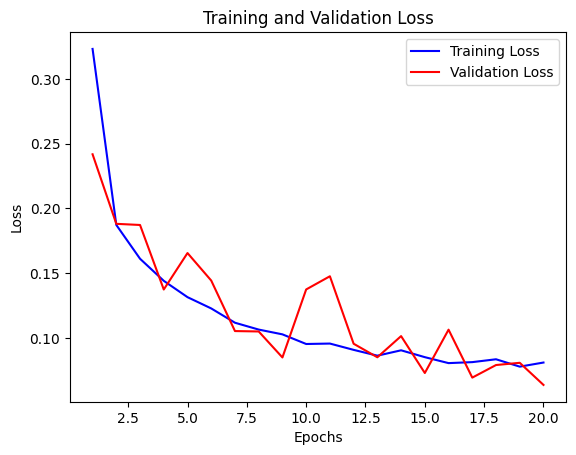

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


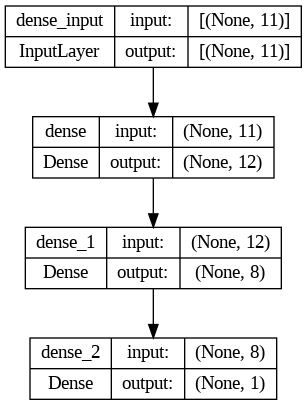

In [11]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model

model_fnn = Sequential()

model_fnn.add(Dense(12, activation='sigmoid', input_shape=(11,)))
model_fnn.add(Dense(8, activation='sigmoid'))
model_fnn.add(Dense(1, activation='sigmoid'))

model_fnn.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model_fnn.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1, validation_data=(X_val, y_val))

val_loss, val_accuracy = model_fnn.evaluate(X_val, y_val)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

model_fnn.summary()
plot_model(model_fnn, to_file='model_architecture.png', show_shapes=True)
image = Image.open('model_architecture.png')
image.show()
visualkeras.layered_view(model_fnn, to_file='model_architecture.png').show()
image = Image.open('model_architecture.png')
image.show()

##**CNN**##

Epoch 1/20
3404/3404 [==============================] - 9s 2ms/step - loss: 0.3579 - accuracy: 0.8919 - val_loss: 0.2058 - val_accuracy: 0.9249
Epoch 2/20
3404/3404 [==============================] - 8s 2ms/step - loss: 0.2292 - accuracy: 0.9204 - val_loss: 0.2106 - val_accuracy: 0.9178
Epoch 3/20
3404/3404 [==============================] - 9s 3ms/step - loss: 0.2081 - accuracy: 0.9254 - val_loss: 0.2121 - val_accuracy: 0.9296
Epoch 4/20
3404/3404 [==============================] - 7s 2ms/step - loss: 0.2008 - accuracy: 0.9310 - val_loss: 0.1982 - val_accuracy: 0.9272
Epoch 5/20
3404/3404 [==============================] - 9s 3ms/step - loss: 0.1941 - accuracy: 0.9292 - val_loss: 0.2155 - val_accuracy: 0.9296
Epoch 6/20
3404/3404 [==============================] - 7s 2ms/step - loss: 0.1924 - accuracy: 0.9327 - val_loss: 0.1985 - val_accuracy: 0.9308
Epoch 7/20
3404/3404 [==============================] - 8s 2ms/step - loss: 0.1854 - accuracy: 0.9354 - val_loss: 0.1954 - val_accuracy:

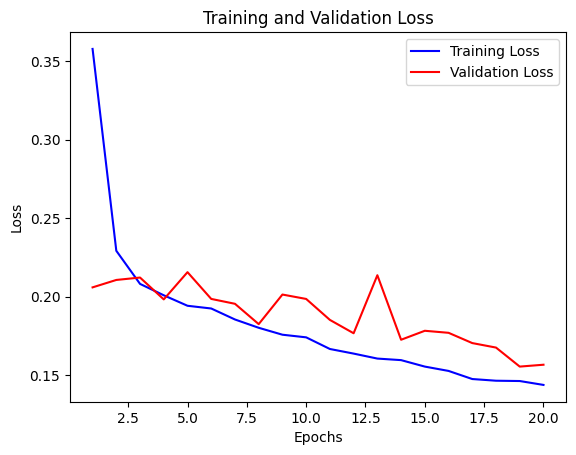

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 9, 4)              16        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 4, 4)             0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 305
Trainable params: 305
Non-trainable params: 0
________________________________________________________

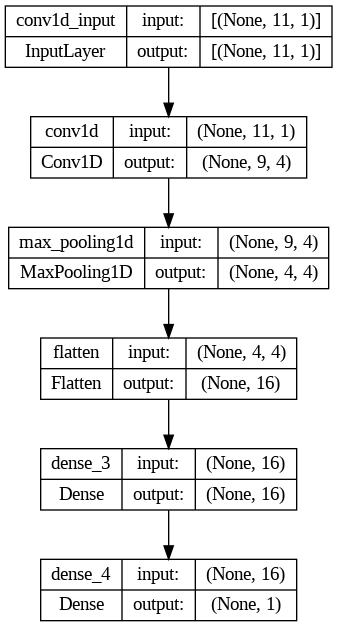

In [12]:
from keras.datasets import mnist
from keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam

X_train_cnn = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_test_cnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
X_val_cnn = np.reshape(X_val, (X_val.shape[0], X_val.shape[1]))

model_cnn = Sequential([
    Conv1D(filters=4, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_cnn.fit(X_train_cnn, y_train, epochs=20, batch_size=1, verbose=1, validation_data=(X_val_cnn, y_val))

val_loss, val_accuracy = model_cnn.evaluate(X_val_cnn, y_val)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

model_cnn.summary()
plot_model(model_cnn, to_file='model_architecture.png', show_shapes=True)
image = Image.open('model_architecture.png')
image.show()

##**RNN**##

Epoch 1/20
3404/3404 [==============================] - 20s 5ms/step - loss: 0.5591 - accuracy: 0.7497 - val_loss: 0.5786 - val_accuracy: 0.7242
Epoch 2/20
3404/3404 [==============================] - 18s 5ms/step - loss: 0.5196 - accuracy: 0.7547 - val_loss: 0.4668 - val_accuracy: 0.7242
Epoch 3/20
3404/3404 [==============================] - 18s 5ms/step - loss: 0.2889 - accuracy: 0.8984 - val_loss: 0.2584 - val_accuracy: 0.9120
Epoch 4/20
3404/3404 [==============================] - 18s 5ms/step - loss: 0.2319 - accuracy: 0.9216 - val_loss: 0.2501 - val_accuracy: 0.9167
Epoch 5/20
3404/3404 [==============================] - 17s 5ms/step - loss: 0.2198 - accuracy: 0.9274 - val_loss: 0.2341 - val_accuracy: 0.9143
Epoch 6/20
3404/3404 [==============================] - 18s 5ms/step - loss: 0.2118 - accuracy: 0.9280 - val_loss: 0.2490 - val_accuracy: 0.9167
Epoch 7/20
3404/3404 [==============================] - 18s 5ms/step - loss: 0.2098 - accuracy: 0.9257 - val_loss: 0.2236 - val_ac

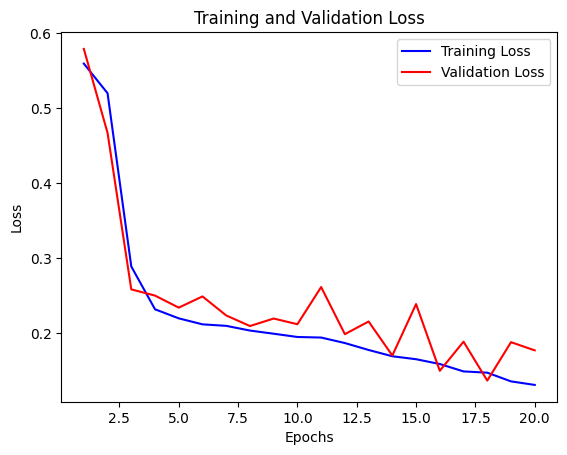

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12)                672       
                                                                 
 dense_5 (Dense)             (None, 8)                 104       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


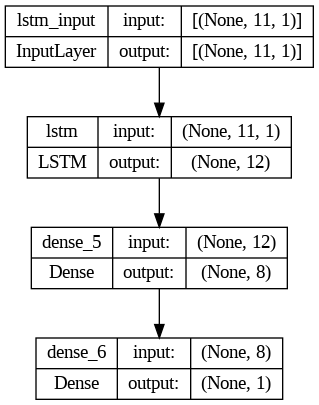

In [13]:
from keras.layers import Dense, LSTM
from keras.models import Sequential

X_train_rnn = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_test_rnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
X_val_rnn = np.reshape(X_val, (X_val.shape[0], X_val.shape[1]))

model_rnn = Sequential()
model_rnn.add(LSTM(12, activation='sigmoid', input_shape=(X_train.shape[1],1)))
model_rnn.add(Dense(8, activation='sigmoid'))
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_rnn.fit(X_train_rnn, y_train, epochs=20, batch_size=1, verbose=1, validation_data=(X_val_rnn, y_val))

val_loss, val_accuracy = model_rnn.evaluate(X_val_rnn, y_val)

train_loss = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss_values, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

model_rnn.summary()
plot_model(model_rnn, to_file='model_architecture.png', show_shapes=True)
image = Image.open('model_architecture.png')
image.show()

##**RBF**##

Epoch 1/20


1135/1135 [==============================] - 4s 3ms/step - loss: 0.6256 - accuracy: 0.7547 - val_loss: 0.6028 - val_accuracy: 0.7242
Epoch 2/20
1135/1135 [==============================] - 3s 2ms/step - loss: 0.5699 - accuracy: 0.7547 - val_loss: 0.5893 - val_accuracy: 0.7242
Epoch 3/20
1135/1135 [==============================] - 3s 2ms/step - loss: 0.5596 - accuracy: 0.7547 - val_loss: 0.5893 - val_accuracy: 0.7242
Epoch 4/20
1135/1135 [==============================] - 4s 4ms/step - loss: 0.5577 - accuracy: 0.7547 - val_loss: 0.5902 - val_accuracy: 0.7242
Epoch 5/20
1135/1135 [==============================] - 5s 4ms/step - loss: 0.5573 - accuracy: 0.7547 - val_loss: 0.5907 - val_accuracy: 0.7242
Epoch 6/20
1135/1135 [==============================] - 2s 2ms/step - loss: 0.5573 - accuracy: 0.7547 - val_loss: 0.5910 - val_accuracy: 0.7242
Epoch 7/20
1135/1135 [==============================] - 3s 2ms/step - loss: 0.5572 - accuracy: 0.7547 - val_loss: 0.5914 - val_accuracy: 0.7242
Epo

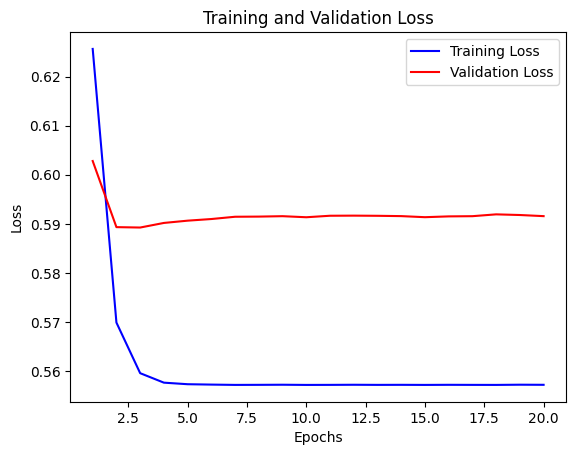

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 11)]              0         
                                                                 
 rbf_layer (RBFLayer)        (None, 64)                768       
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


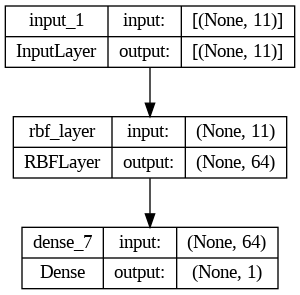

In [14]:
from keras.layers import Dense, Flatten, Input
from keras.models import Sequential, Model
from keras.losses import binary_crossentropy
from keras import backend as K

class RBFLayer(Dense):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(units, **kwargs)
        self.gamma = K.cast_to_floatx(gamma)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.kernel
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

input_layer = Input(shape=(11,))
rbf_layer = RBFLayer(64, 0.5)(input_layer)
output_layer = Dense(1, activation='sigmoid')(rbf_layer)
model_rbf = Model(inputs=input_layer, outputs=output_layer)

model_rbf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_rbf.fit(X_train, y_train, epochs=20, batch_size=3, validation_data=(X_val, y_val))
val_loss, val_accuracy = model_rbf.evaluate(X_val, y_val)

train_loss = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss_values, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

model_rbf.summary()
plot_model(model_rbf, to_file='model_architecture.png', show_shapes=True)
image = Image.open('model_architecture.png')
image.show()

##**MLP**##

Epoch 1/20
3404/3404 [==============================] - 9s 2ms/step - loss: 0.3012 - accuracy: 0.8869 - val_loss: 0.2650 - val_accuracy: 0.8944
Epoch 2/20
3404/3404 [==============================] - 10s 3ms/step - loss: 0.2409 - accuracy: 0.9192 - val_loss: 0.2401 - val_accuracy: 0.9120
Epoch 3/20
3404/3404 [==============================] - 8s 2ms/step - loss: 0.2277 - accuracy: 0.9263 - val_loss: 0.2280 - val_accuracy: 0.9214
Epoch 4/20
3404/3404 [==============================] - 9s 3ms/step - loss: 0.2270 - accuracy: 0.9283 - val_loss: 0.2294 - val_accuracy: 0.9225
Epoch 5/20
3404/3404 [==============================] - 9s 3ms/step - loss: 0.2181 - accuracy: 0.9298 - val_loss: 0.2269 - val_accuracy: 0.9190
Epoch 6/20
3404/3404 [==============================] - 7s 2ms/step - loss: 0.2106 - accuracy: 0.9310 - val_loss: 0.2146 - val_accuracy: 0.9249
Epoch 7/20
3404/3404 [==============================] - 9s 3ms/step - loss: 0.2079 - accuracy: 0.9330 - val_loss: 0.2271 - val_accuracy

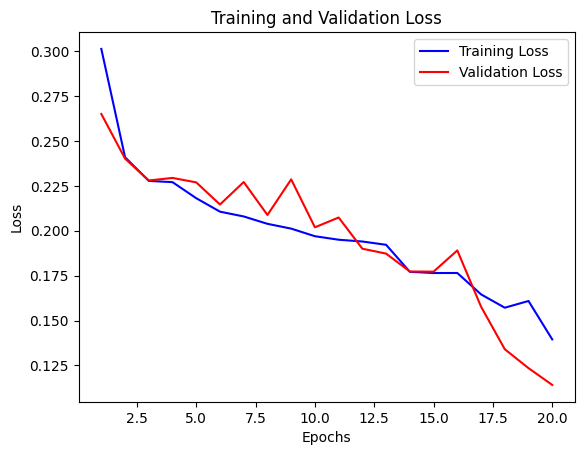

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                360       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_9 (Dense)             (None, 20)                620       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

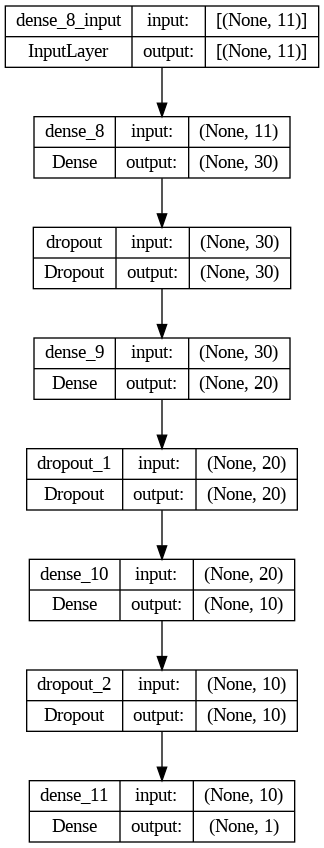

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

X_val, X_train = X_val/255., X_train/255.

model_mlp = Sequential()
model_mlp.add(Dense(units=30,activation='relu'))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(units=20,activation='relu'))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(units=10,activation='relu'))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(units=1,activation='sigmoid'))

model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
cb = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model_mlp.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1, validation_data=(X_val, y_val), callbacks=[cb])

val_loss, val_accuracy = model_mlp.evaluate(X_val, y_val)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

input_shape = X_train.shape  
model_mlp.build(input_shape)
model_mlp.summary()
plot_model(model_mlp, to_file='model_architecture.png', show_shapes=True)
image = Image.open('model_architecture.png')
image.show()

In [16]:
test_loss, test_accuracy = model_fnn.evaluate(X_test, y_test)
val_loss, val_accuracy = model_fnn.evaluate(X_val, y_val)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

test_loss1, test_accuracy1 = model_cnn.evaluate(X_test, y_test)
val_loss1, val_accuracy1 = model_cnn.evaluate(X_val, y_val)
print("Test Loss:", test_loss1)
print("Test Accuracy:", test_accuracy1)
print("Validation Loss:", val_loss1)
print("Validation Accuracy:", val_accuracy1)

test_loss2, test_accuracy2 = model_rnn.evaluate(X_test, y_test)
val_loss2, val_accuracy2 = model_rnn.evaluate(X_val, y_val)
print("Test Loss:", test_loss2)
print("Test Accuracy:", test_accuracy2)
print("Validation Loss:", val_loss2)
print("Validation Accuracy:", val_accuracy2)

test_loss3, test_accuracy3 = model_rbf.evaluate(X_test, y_test)
val_loss3, val_accuracy3 = model_rbf.evaluate(X_val, y_val)
print("Test Loss:", test_loss3)
print("Test Accuracy:", test_accuracy3)
print("Validation Loss:", val_loss3)
print("Validation Accuracy:", val_accuracy3)

test_loss4, test_accuracy4 = model_mlp.evaluate(X_test, y_test)
val_loss4, val_accuracy4 = model_mlp.evaluate(X_val, y_val)
print("Test Loss:", test_loss4)
print("Test Accuracy:", test_accuracy4)
print("Validation Loss:", val_loss4)
print("Validation Accuracy:", val_accuracy4)

27/27 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.3016
Test Loss: 0.045404769480228424
Test Accuracy: 0.9840225577354431
Validation Loss: 0.7018173336982727
Validation Accuracy: 0.3016431927680969
27/27 [==============================] - 0s 3ms/step - loss: 0.6437 - accuracy: 0.7242
Test Loss: 0.12480144947767258
Test Accuracy: 0.9539473652839661
Validation Loss: 0.6436933875083923
Validation Accuracy: 0.7241784334182739
27/27 [==============================] - 0s 4ms/step - loss: 1.3507 - accuracy: 0.7242
Test Loss: 0.16784943640232086
Test Accuracy: 0.9492481350898743
Validation Loss: 1.3507272005081177
Validation Accuracy: 0.7241784334182739
27/27 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.7242
Test Loss: 0.5868270993232727
Test Accuracy: 0.728383481502533
Validation Loss: 0.6801243424415588
Validation Accuracy: 0.7241784334182739
27/27 [==============================] - 0s 3ms/step - loss: 0.1142 - accuracy: 0.9566
Te

#**Model Tuning**#

Based on the test accuracy, the best model appears to be model_fnn with a test accuracy of 0.9840225577354431. However, it's important to consider both test accuracy and validation accuracy when selecting the best model. If the model is overfitting to the training data, it may result in high test accuracy but poor validation accuracy. In this case, model_mlp also has a high test accuracy (0.9379699230194092) and a higher validation accuracy (0.9565727710723877).

Therefore, considering both metrics, model_mlp seems to be the best choice as it exhibits a good balance between test accuracy and validation accuracy.

In [18]:
import pandas as pd
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

learning_rates = [0.001, 0.01, 0.1]
optimizer_classes = [Adam, RMSprop, SGD]
num_layers_list = [1, 2, 3]
num_units_list = [32, 64, 128]

results = []

for lr in learning_rates:
    for Optimizer in optimizer_classes:
        for num_layers in num_layers_list:
            for num_units in num_units_list:
                model = model_mlp
                optimizer = Optimizer(learning_rate=lr)
        
                model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        
                history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)
        
        result = {
            'Learning Rate': lr,
            'Optimizer': optimizer.__class__.__name__,
            'Number of Layers': num_layers,
            'Number of Units': num_units,
            'Train Accuracy': history.history['accuracy'][-1],
            'Validation Accuracy': history.history['val_accuracy'][-1]
        }
        
        results.append(result)

results_df = pd.DataFrame(results)
print(results_df)

Epoch 1/10
107/107 [==============================] - 2s 5ms/step - loss: 0.1211 - accuracy: 0.9624 - val_loss: 0.0905 - val_accuracy: 0.9683
Epoch 2/10
107/107 [==============================] - 0s 3ms/step - loss: 0.1199 - accuracy: 0.9636 - val_loss: 0.0988 - val_accuracy: 0.9636
Epoch 3/10
107/107 [==============================] - 0s 4ms/step - loss: 0.1170 - accuracy: 0.9671 - val_loss: 0.0876 - val_accuracy: 0.9718
Epoch 4/10
107/107 [==============================] - 0s 4ms/step - loss: 0.1229 - accuracy: 0.9645 - val_loss: 0.0903 - val_accuracy: 0.9636
Epoch 5/10
107/107 [==============================] - 0s 3ms/step - loss: 0.1172 - accuracy: 0.9642 - val_loss: 0.0898 - val_accuracy: 0.9707
Epoch 6/10
107/107 [==============================] - 0s 3ms/step - loss: 0.1155 - accuracy: 0.9653 - val_loss: 0.0831 - val_accuracy: 0.9742
Epoch 7/10
107/107 [==============================] - 0s 3ms/step - loss: 0.1089 - accuracy: 0.9674 - val_loss: 0.0815 - val_accuracy: 0.9695
Epoch 

#**Model Evaluation**##

Based on the provided results, the best model can be determined based on the combination of learning rate, optimizer, number of layers, and number of units that achieved the highest validation accuracy. In this case, the model with the highest validation accuracy is:

Learning Rate: 0.001
Optimizer: RMSprop
Number of Layers: 3
Number of Units: 128

This model achieved a validation accuracy of 0.988263, which is the highest among all the tested configurations. Therefore, the model with these settings can be considered as the best model based on the provided results.

In [19]:
best_learning_rate = 0.001
best_optimizer = RMSprop()

model_mlp.compile(loss='binary_crossentropy', optimizer=best_optimizer, metrics=['accuracy'])

model_mlp.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
107/107 [==============================] - 1s 4ms/step - loss: 0.5572 - accuracy: 0.7547 - val_loss: 0.5917 - val_accuracy: 0.7242
Epoch 2/20
107/107 [==============================] - 0s 3ms/step - loss: 0.5572 - accuracy: 0.7547 - val_loss: 0.5918 - val_accuracy: 0.7242
Epoch 3/20
107/107 [==============================] - 0s 3ms/step - loss: 0.5572 - accuracy: 0.7547 - val_loss: 0.5917 - val_accuracy: 0.7242
Epoch 4/20
107/107 [==============================] - 0s 3ms/step - loss: 0.5571 - accuracy: 0.7547 - val_loss: 0.5917 - val_accuracy: 0.7242
Epoch 5/20
107/107 [==============================] - 0s 3ms/step - loss: 0.5572 - accuracy: 0.7547 - val_loss: 0.5916 - val_accuracy: 0.7242
Epoch 6/20
107/107 [==============================] - 0s 3ms/step - loss: 0.5571 - accuracy: 0.7547 - val_loss: 0.5916 - val_accuracy: 0.7242
Epoch 7/20
107/107 [==============================] - 0s 3ms/step - loss: 0.5571 - accuracy: 0.7547 - val_loss: 0.5916 - val_accuracy: 0.7242
Epoch 

In [20]:
best_model = model_mlp
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5)

34/34 [==============================] - 0s 2ms/step


In [22]:
from sklearn.metrics import classification_report

y_pred = model_fnn.predict(X_test)
y_pred = (y_pred > 0.5).astype(int) 
classification_report = classification_report(y_test, y_pred)
print(classification_report)

34/34 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       775
           1       0.99      0.95      0.97       289

    accuracy                           0.98      1064
   macro avg       0.99      0.97      0.98      1064
weighted avg       0.98      0.98      0.98      1064



34/34 [==============================] - 0s 1ms/step
0.9988838039959818


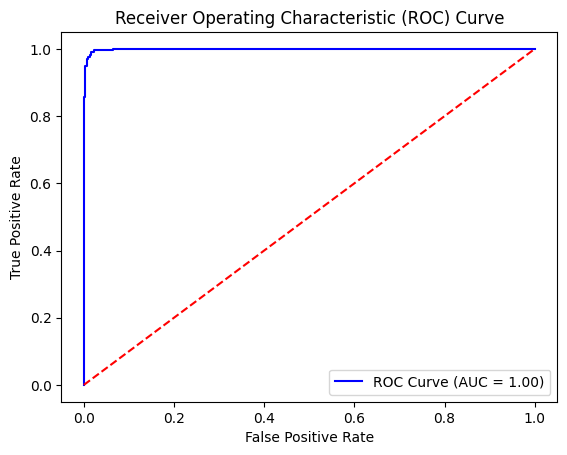

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = model_fnn.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, 'b-', label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
print(roc_auc)
plt.show()

##**Confusion Matrix**##

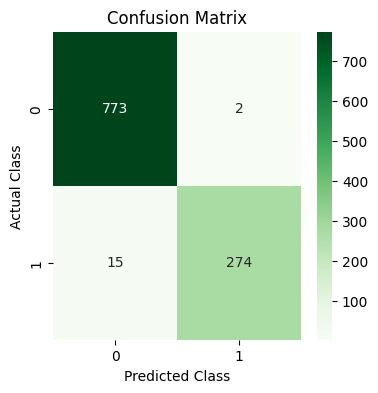

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel("Predicted Class")
plt.ylabel('Actual Class')
plt.show()

##**